# Santander bank's Kaggle contest

This notebook shows a simple solution to the a Kaggle contest submitted by the Santander bank aiming at predicting customer statisfaction from data. A complete description of the model and the associated data are available at the link below

https://www.kaggle.com/c/santander-customer-satisfaction/

The solution detailed here does not aim at providing the best possible algorithm. It is rather a proof of concept aimed at learning basics of predictive analytics using Spark, Python and various open source libraries. 


----

Combient AB - Company confidential


---------

---------

## Importing the data

For this case, we will use an open source library from Dato Inc. called SFrame to import the data, do basic manipulations and upload it to Spark. 
SFrame goals is to allow manipulations of large datasets on standard computer storing the data on disk and accessing it in an optimised manner. 

While it is possible yo import a .csv file directly into Spark (see Combient's predictive maintenance prototype), the main reason to use SFrame in this case is for its advanced parser that can infer the sturture and schema directly from the data (thus saving us from specifying a schema for 300+ variable by hand). It is also useful to illustrate that one can make reuse code and libraries avaible for Python while using Spark. 


SFrame is a data structure representing data in a table. It is conceptually very similar to Pandas' dataframe and Spark dataframes and data can easily be converted from one format to another. The main difference is that Pandas' dataframe is a fully in-memory structure, SFrame is on-disk data structure with optimized access, lazy evaluation* and parallelized operations and Spark dataframe is a (in-memory or on-disk) Spark object distributed over several machines in a cluster, also operating based on lazy evaluation*. 
In here, we will adopt the naming convention that a SFrame starts with the prefix sf_ , a Pandas dataframe with pd_ and a Spark daframe with spark_ 


*Lazy evaluation: https://en.wikipedia.org/wiki/Lazy_evaluation


In [1]:
import sframe
#sf_train = sframe.SFrame.read_csv('/home/xadmin/Santander/data/train.csv',nrows_to_infer=80000) #Use this line on the Combient cluster
sf_train = sframe.SFrame.read_csv('./data/train.csv',nrows_to_infer=80000) #Use this line on the VM

2016-05-13 14:53:02,978 [INFO] sframe.cython.cy_server, 172: SFrame v1.9 started. Logging /tmp/sframe_server_1463143982.log


------------------------------------------------------
Inferred types from first 80000 line(s) of file as 
column_type_hints=[int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,float,float,float,float,float,float,float,int,float,float,float,int,float,float,float,float,int,int,float,float,float,float,float,int,float,float,int,float,float,int,int,int,int,float,

Read 67150 lines. Lines per second: 32138.8

Finished parsing file /media/sf_VMShared/Santader/data/train.csv

Parsing completed. Parsed 76020 lines in 2.21851 secs.

-----

The data has now been imported into an SFrame and can be easily visualized on the local machine: 

In [2]:
sf_train.head()

ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1
1,2,23,0.0,0.0,0.0,0.0
3,2,34,0.0,0.0,0.0,0.0
4,2,23,0.0,0.0,0.0,0.0
8,2,37,0.0,195.0,195.0,0.0
10,2,39,0.0,0.0,0.0,0.0
13,2,23,0.0,0.0,0.0,0.0
14,2,27,0.0,0.0,0.0,0.0
18,2,26,0.0,0.0,0.0,0.0
20,2,45,0.0,0.0,0.0,0.0
23,2,25,0.0,0.0,0.0,0.0


Print only one column: 

In [3]:
sf_train["TARGET"]

dtype: int
Rows: 76020
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... ]

Look at basic characteristics of the data: 

In [4]:
print "Number columns: %d" % sf_train.num_cols()
print "Number rows: %d" % sf_train.num_rows()
print "Number unhappy %d" %sf_train["TARGET"].sum()

Number columns: 371
Number rows: 76020
Number unhappy 3008


## Loading the data into Spark

The next block of code simply initializes Spark and should be called once before any interaction with Spark. 

In [5]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext()   #This line is not needed in some platforms. Comment it out if it causes an error. 
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(sc)

We now create a spark dataframe from the previously imported SFrame with a single line: 

In [6]:
spark_train=sf_train.to_spark_dataframe(sc,sqlContext,4)  
#The 3rd argument specifies in how many slices we want to distribute the data

/var/tmp/graphlab-root/31317/0818541e-69ca-4ef6-bfb2-d69b5d66dba0



-----
## Exploring and cleaning the dataset

Below we explore various aspect of the data provided to us using various tools. 

----

We start by looking a basic statistics of the data. 
We use Spark to calculate the statistical quantities with the .describe(), then convert the resulting spark dataframe to a Panda dataframe using .toPandas(). 

NB: The net effect of calling .toPandas() is to materialize the daframe on Spark, re-assemble it and transfer all the data back to the local machine. 


In [7]:
pd_descript=spark_train.describe().toPandas()
pd_descript #Show the data in the notebook

,summary,ID,TARGET,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,...,saldo_var44,saldo_var46,saldo_var5,saldo_var6,saldo_var8,var15,var21,var3,var36,var38
0,count,76020,76020,76020,76020,76020,76020,76020,76020,76020,...,76020,76020,76020,76020,76020,76020,76020,76020,76020,76020
1,mean,75964.05072349381,0.0395685345961589,263088.6608524073,263088.6608524073,4.867140223587234E7,5130228.886430353,131544.33014110575,9208103.129716748,4998684.556195738,...,96.35273796369374,0.0,1028.4682352012637,0.41447513812154696,141.2267841357537,33.21286503551697,32.54932912391476,-1523.1992765061825,40.44907918968693,117235.8094303818
2,stddev,43781.94737949407,0.19494451923252248,5.129183170821656E7,5.129183170821647E7,6.959536539899061E8,2.2644346784096876E8,3.6269040573615596E7,3.0331081797425807E8,2.2352296512492162E8,...,5218.428364852769,0.0,9852.140072527223,83.09679698652009,2515.6563021251186,12.956485816411215,393.8349394898184,39033.462363863226,47.36271915110925,182664.5985028725
3,min,1,0,0,0,-1.0,-1.0,-1.0,-1.0,0,...,0.0,0,-2895.72,0.0,-4942.26,5,0,-999999,0,5163.75
4,max,151838,1,9999999999,9999999999,9.999999999E9,9.999999999E9,9.999999999E9,9.999999999E9,9999999999,...,740006.61,0,619329.15,19531.8,240045.0,105,30000,238,99,2.203473876E7


NB: SFrame is also slightly better at displaying data a notebook

In [8]:
sframe.SFrame(pd_descript)

Columns:
	summary	str
	ID	str
	TARGET	str
	delta_imp_amort_var18_1y3	str
	delta_imp_amort_var34_1y3	str
	delta_imp_aport_var13_1y3	str
	delta_imp_aport_var17_1y3	str
	delta_imp_aport_var33_1y3	str
	delta_imp_compra_var44_1y3	str
	delta_imp_reemb_var13_1y3	str
	delta_imp_reemb_var17_1y3	str
	delta_imp_reemb_var33_1y3	str
	delta_imp_trasp_var17_in_1y3	str
	delta_imp_trasp_var17_out_1y3	str
	delta_imp_trasp_var33_in_1y3	str
	delta_imp_trasp_var33_out_1y3	str
	delta_imp_venta_var44_1y3	str
	delta_num_aport_var13_1y3	str
	delta_num_aport_var17_1y3	str
	delta_num_aport_var33_1y3	str
	delta_num_compra_var44_1y3	str
	delta_num_reemb_var13_1y3	str
	delta_num_reemb_var17_1y3	str
	delta_num_reemb_var33_1y3	str
	delta_num_trasp_var17_in_1y3	str
	delta_num_trasp_var17_out_1y3	str
	delta_num_trasp_var33_in_1y3	str
	delta_num_trasp_var33_out_1y3	str
	delta_num_venta_var44_1y3	str
	imp_amort_var18_hace3	str
	imp_amort_var18_ult1	str
	imp_amort_var34_hace3	str
	imp_amort_var34_ult1	str
	imp_aport_var13_hace3	str
	imp_aport_var13_ult1	str
	imp_aport_var17_hace3	str
	imp_aport_var17_ult1	str
	imp_aport_var33_hace3	str
	imp_aport_var33_ult1	str
	imp_compra_var44_hace3	str
	imp_compra_var44_ult1	str
	imp_ent_var16_ult1	str
	imp_op_var39_comer_ult1	str
	imp_op_var39_comer_ult3	str
	imp_op_var39_efect_ult1	str
	imp_op_var39_efect_ult3	str
	imp_op_var39_ult1	str
	imp_op_var40_comer_ult1	str
	imp_op_var40_comer_ult3	str
	imp_op_var40_efect_ult1	str
	imp_op_var40_efect_ult3	str
	imp_op_var40_ult1	str
	imp_op_var41_comer_ult1	str
	imp_op_var41_comer_ult3	str
	imp_op_var41_efect_ult1	str
	imp_op_var41_efect_ult3	str
	imp_op_var41_ult1	str
	imp_reemb_var13_hace3	str
	imp_reemb_var13_ult1	str
	imp_reemb_var17_hace3	str
	imp_reemb_var17_ult1	str
	imp_reemb_var33_hace3	str
	imp_reemb_var33_ult1	str
	imp_sal_var16_ult1	str
	imp_trans_var37_ult1	str
	imp_trasp_var17_in_hace3	str
	imp_trasp_var17_in_ult1	str
	imp_trasp_var17_out_hace3	str
	imp_trasp_var17_out_ult1	str
	imp_trasp_var33_in_hace3	str
	imp_trasp_var33_in_ult1	str
	imp_trasp_var33_out_hace3	str
	imp_trasp_var33_out_ult1	str
	imp_var43_emit_ult1	str
	imp_var7_emit_ult1	str
	imp_var7_recib_ult1	str
	imp_venta_var44_hace3	str
	imp_venta_var44_ult1	str
	ind_var1	str
	ind_var10_ult1	str
	ind_var10cte_ult1	str
	ind_var12	str
	ind_var12_0	str
	ind_var13	str
	ind_var13_0	str
	ind_var13_corto	str
	ind_var13_corto_0	str
	ind_var13_largo	str
	ind_var13_largo_0	str
	ind_var13_medio	str
	ind_var13_medio_0	str
	ind_var14	str
	ind_var14_0	str
	ind_var17	str
	ind_var17_0	str
	ind_var18	str
	ind_var18_0	str
	ind_var19	str
	ind_var1_0	str
	ind_var2	str
	ind_var20	str
	ind_var20_0	str
	ind_var24	str
	ind_var24_0	str
	ind_var25	str
	ind_var25_0	str
	ind_var25_cte	str
	ind_var26	str
	ind_var26_0	str
	ind_var26_cte	str
	ind_var27	str
	ind_var27_0	str
	ind_var28	str
	ind_var28_0	str
	ind_var29	str
	ind_var29_0	str
	ind_var2_0	str
	ind_var30	str
	ind_var30_0	str
	ind_var31	str
	ind_var31_0	str
	ind_var32	str
	ind_var32_0	str
	ind_var32_cte	str
	ind_var33	str
	ind_var33_0	str
	ind_var34	str
	ind_var34_0	str
	ind_var37	str
	ind_var37_0	str
	ind_var37_cte	str
	ind_var39	str
	ind_var39_0	str
	ind_var40	str
	ind_var40_0	str
	ind_var41	str
	ind_var41_0	str
	ind_var43_emit_ult1	str
	ind_var43_recib_ult1	str
	ind_var44	str
	ind_var44_0	str
	ind_var46	str
	ind_var46_0	str
	ind_var5	str
	ind_var5_0	str
	ind_var6	str
	ind_var6_0	str
	ind_var7_emit_ult1	str
	ind_var7_recib_ult1	str
	ind_var8	str
	ind_var8_0	str
	ind_var9_cte_ult1	str
	ind_var9_ult1	str
	num_aport_var13_hace3	str
	num_aport_var13_ult1	str
	num_aport_var17_hace3	str
	num_aport_var17_ult1	str
	num_aport_var33_hace3	str
	num_aport_var33_ult1	str
	num_compra_var44_hace3	str
	num_compra_var44_ult1	str
	num_ent_var16_ult1	str
	num_med_var22_ult3	str
	num_med_var45_ult3	str
	num_meses_var12_ult3	str
	num_meses_var13_corto_ult3	str
	num_meses_var13_largo_ult3	str
	num_meses_var13_medio_ult3	str
	num_meses_var17_ult3	str
	num_meses_var29_ult3	str
	num_meses_var33_ult3	str
	num_

We remark that, for example, column saldo_var46 has zero standard deviation, meaning that values in that column never change. Columns of such types are thus totally useless!

----

The next block only converts the Pandas' dataframe into an SFrame and performs necessary but cumbersome type conversions (the numbers in pd_descript are actually represented as strings! ). 

In [9]:
#This complicated line only performs types conversion and data structure manipulations
pd_tmp=pd_descript.set_index('summary').transpose().convert_objects(convert_numeric=True) 
pd_tmp['summary']=pd_tmp.index

#Convert to SFrame and print the types of the columns to verify that everything is fine!
sf_descript=sframe.SFrame(pd_tmp)
sf_descript.column_types

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


<bound method SFrame.column_types of Columns:
	count	int
	mean	float
	stddev	float
	min	float
	max	float
	summary	str

Rows: 371

Data:
+-------+-----------------+----------------+------+--------------+
| count |       mean      |     stddev     | min  |     max      |
+-------+-----------------+----------------+------+--------------+
| 76020 |  75964.0507235  | 43781.9473795  | 1.0  |   151838.0   |
| 76020 | 0.0395685345962 | 0.194944519233 | 0.0  |     1.0      |
| 76020 |  263088.660852  | 51291831.7082  | 0.0  | 9999999999.0 |
| 76020 |  263088.660852  | 51291831.7082  | 0.0  | 9999999999.0 |
| 76020 |  48671402.2359  |  695953653.99  | -1.0 | 9999999999.0 |
| 76020 |  5130228.88643  | 226443467.841  | -1.0 | 9999999999.0 |
| 76020 |  131544.330141  | 36269040.5736  | -1.0 | 9999999999.0 |
| 76020 |  9208103.12972  | 303310817.974  | -1.0 | 9999999999.0 |
| 76020 |   4998684.5562  | 223522965.125  | 0.0  | 9999999999.0 |
| 76020 |  2630886.60851  | 162179809.193  | -1.0 | 99999999

And now we can easily filter the columns with zero standard deviation with an SQL-style query on the SFrame:

In [10]:
sf_columns_to_remove = sf_descript[sf_descript['stddev']==0]
sf_columns_to_remove

count,mean,stddev,min,max,summary
76020,0.0,0.0,0.0,0.0,imp_amort_var18_hace3
76020,0.0,0.0,0.0,0.0,imp_amort_var34_hace3
76020,0.0,0.0,0.0,0.0,imp_reemb_var13_hace3
76020,0.0,0.0,0.0,0.0,imp_reemb_var33_hace3
76020,0.0,0.0,0.0,0.0,imp_trasp_var17_out_hace3
76020,0.0,0.0,0.0,0.0,imp_trasp_var33_out_hace3
76020,0.0,0.0,0.0,0.0,ind_var2
76020,0.0,0.0,0.0,0.0,ind_var27
76020,0.0,0.0,0.0,0.0,ind_var27_0
76020,0.0,0.0,0.0,0.0,ind_var28


Finally, we remove these columns from the Spark dataframe: 

In [11]:
spark_tmp_df=spark_train
for col in sf_columns_to_remove["summary"]:
    spark_tmp_df=spark_tmp_df.drop(col) #TO DO: is there a way to drop multiple columns at once ? 
spark_train_filtered=spark_tmp_df   
print "Original Nb of columns: %d " % len(spark_train.columns)
print "New Nb of columns: %d " % len(spark_train_filtered.columns)

Original Nb of columns: 371 
New Nb of columns: 337 


**Remark:** For a production run, one would typically skip importing these columns, instead of loading them and deleting them afterwards. 

-----

... and do the same for the SFrame stored locally.

In [12]:
sf_train.remove_columns(sf_columns_to_remove['summary']) #.remove_columns operates in place
sf_train.num_cols() #Down from 371

337

Now, we convert the SFrame into a Pandas' dataframe and calculate the correlation matrix between each pairs of columns. 

**NB:** This will only work if all the data can be stored in memory, which is the case here, but this method won't scale to large datasets.

In [13]:
pd_corr_train=sf_train.to_dataframe().corr()
pd_corr_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-6.302170e-03,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,1.690469e-03,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,4.851218e-02,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,9.377310e-03,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,2.952946e-01,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
imp_op_var39_comer_ult3,-0.004131,0.006817,0.101177,0.034879,0.886476,1.000000,0.316671,3.556704e-01,0.029094,0.055449,...,0.027489,0.021819,0.018427,0.020530,0.008539,0.006359,0.010660,0.009822,0.013271,0.003517
imp_op_var40_comer_ult1,-0.007277,0.001518,0.042754,0.009896,0.342709,0.316671,1.000000,8.522060e-01,0.061187,0.106558,...,0.003191,0.006769,0.001773,0.002694,-0.000436,-0.000480,-0.000254,-0.000372,0.016628,0.003119
imp_op_var40_comer_ult3,-0.006302,0.001690,0.048512,0.009377,0.295295,0.355670,0.852206,1.000000e+00,0.053579,0.110342,...,0.005885,0.010836,0.003285,0.004882,-0.000561,-0.000529,-0.000510,-0.000601,0.015584,-0.000358
imp_op_var40_efect_ult1,-0.006700,0.000530,0.008805,0.000592,0.032280,0.029094,0.061187,5.357914e-02,1.000000,0.887375,...,-0.000235,-0.000162,-0.000210,-0.000220,-0.000211,-0.000170,-0.000254,-0.000268,-0.000315,0.019221
imp_op_var40_efect_ult3,-0.006698,0.000611,0.009678,0.002510,0.054809,0.055449,0.106558,1.103420e-01,0.887375,1.000000,...,-0.000270,-0.000186,-0.000242,-0.000253,-0.000243,-0.000195,-0.000292,-0.000308,0.000682,0.019965


Visualize the correlation matrix using Seaborn
https://stanford.edu/~mwaskom/software/seaborn/

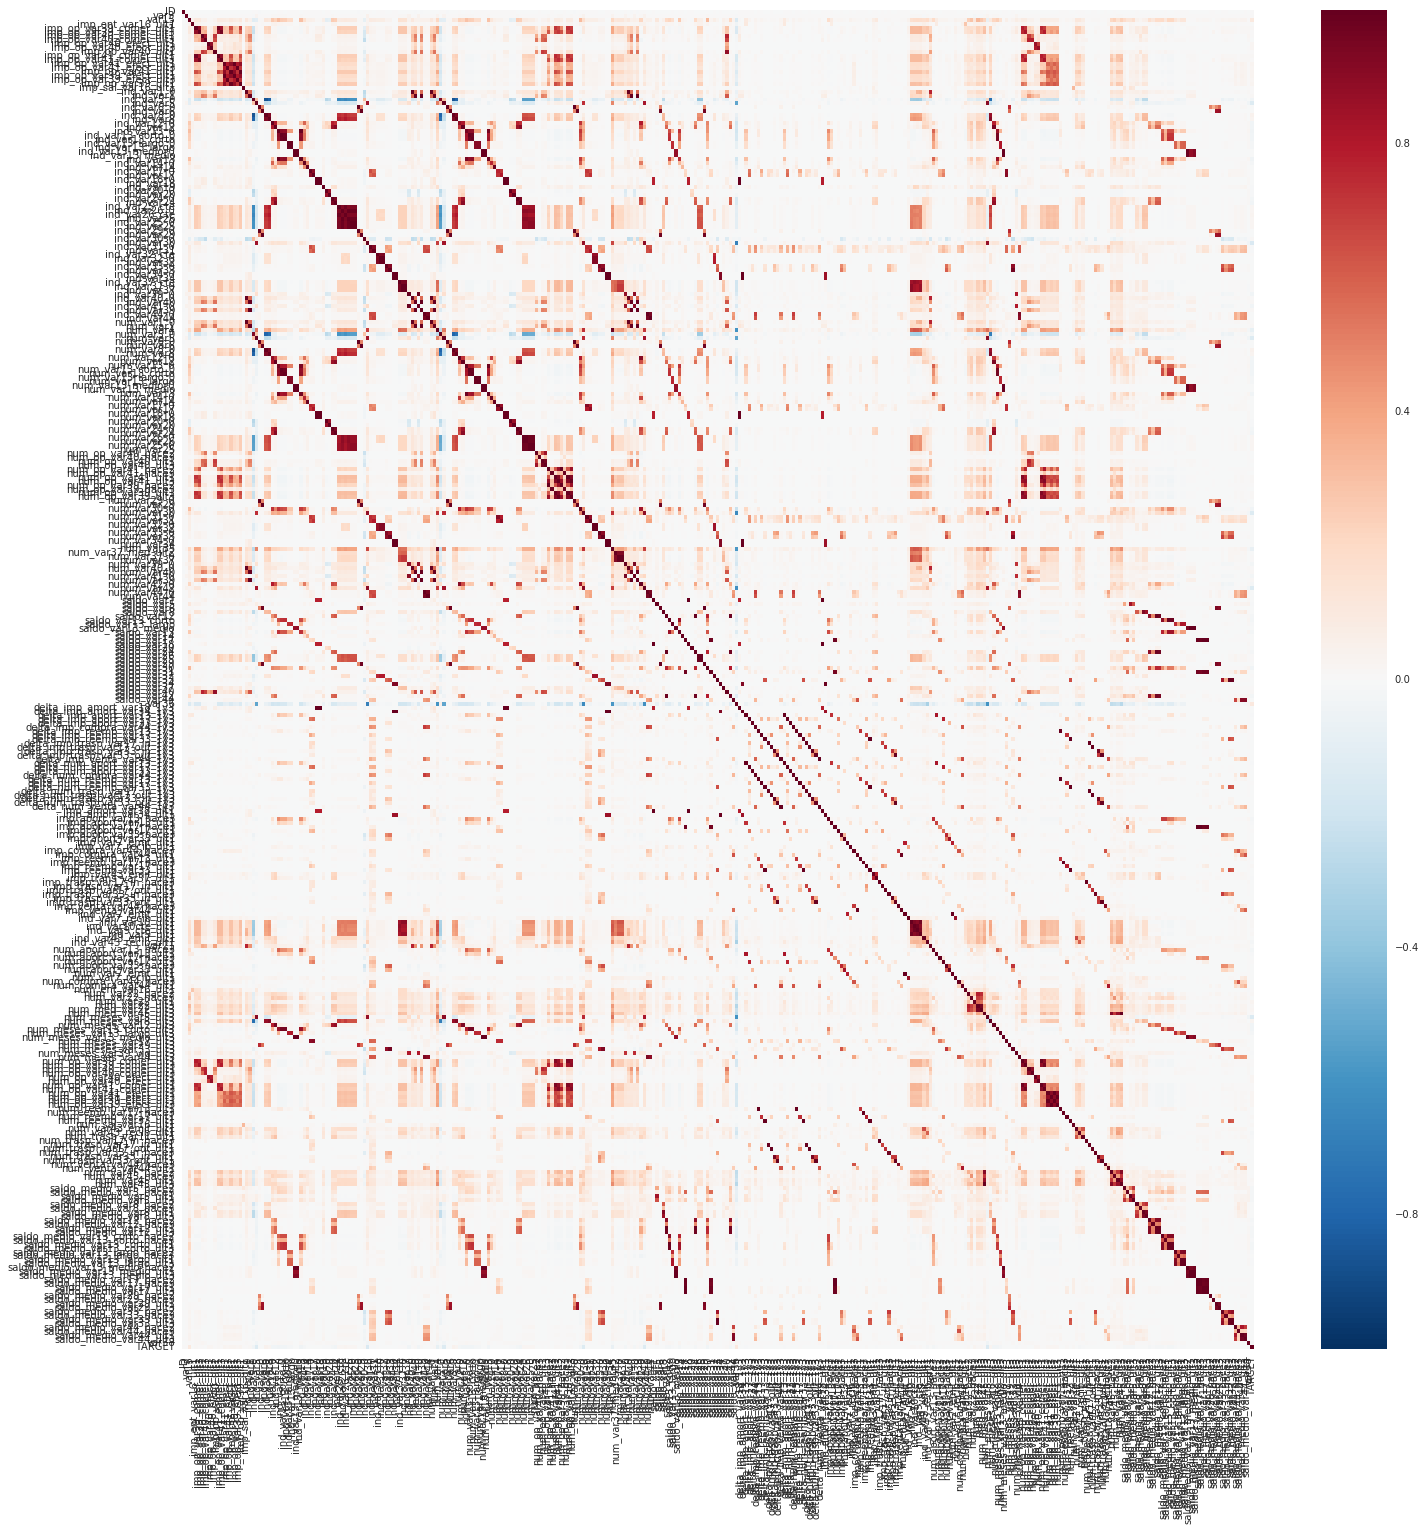

In [14]:
import matplotlib
import seaborn

#This line causes the figure to be displayed inside the notebook
%matplotlib inline  

seaborn.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5, "figure.figsize": (24, 24)}) #Adjust size and style of the figure
seaborn.heatmap(pd_corr_train)

A more useful information is the correlation between each variable and the TARGET:

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


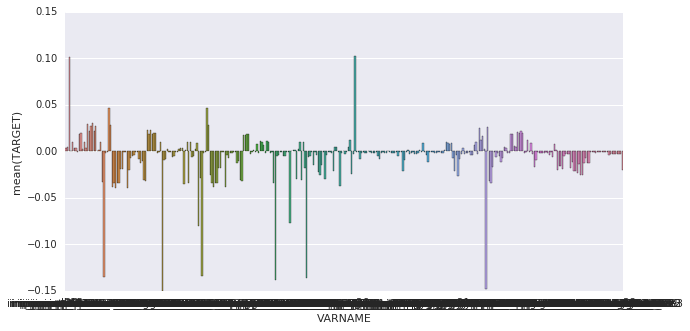

In [15]:
#Extract the line we want
pd_var_target_cor=pd_corr_train[["TARGET"]] 

#Dealing with the index of Pandas' dataframe
pd_var_target_cor["VARNAME"]=pd_var_target_cor.index 
pd_var_target_cor=pd_var_target_cor.drop("TARGET") #Remove the correlation of TARGET with itself

#Plot the data
seaborn.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5, "figure.figsize": (10, 5)})
seaborn.barplot(x="VARNAME",y="TARGET",data=pd_var_target_cor)

Very few variables seems correlated with the Target. We'll come back to this in a later section


------------

**Remark:** For truly big data, it won't be possible to calculate the entire correlation matrix locally as we did it, and would need to calculate the correlations in Spark instead:


In [16]:
### This part still needs some work.
#from pyspark.mllib.linalg import Vectors
#from pyspark.mllib.stat import Statistics
#from pyspark.ml.feature import VectorAssembler,StandardScaler,MinMaxScaler


#assembler = VectorAssembler(
#        inputCols=spark_train_filtered.columns,
#        outputCol="features")
#spark_train_for_corr = assembler.transform(spark_train_filtered).rdd.map(lambda x: Vectors(x))

#pearsonCorr = Statistics.corr(spark_train_for_corr)

## Learning a model in Spark

In this example, we will build a classifier using the (newer) spark.ml library that uses Dataframes and Pipelines.

Pipelines are a data structure that stores all the operations performed to transform the raw data into a format suitable for the classifier. Models defined through pipelines accept data in raw format and automatically replay all the successive data prepation methods automatically, allowing a "define & forget" approach for the data preparation. 

We remark that spark.ml is still under devloppement, not all the algorithms from the (older) spark.mlib library have been ported and models with pipelines still have issues. However, pipelines are an extremely convenient framework for the data scientist, and there is no doubt that the issues in spark.ml will be ironed out in soon to be released versions of Spark. 

Please refer to our predictive maintenance protype for examples of how to do the same using the spark.mlib library.

-------

We start by building a list of variables that we want to use as features for the classifier. As a first step, we will simply use all variables (i.e. all columns except the client ID and the TARGET itself).

In [17]:
features_columns = spark_train_filtered.columns  #Gets the list of columns names from the spark dataframe
features_columns.remove('ID') 
features_columns.remove('TARGET')

We split the data into training (80% of the data) and validation (20% of the data) sets. The validation set will be used for evaluating our model and will never be shown to the classifier during the learning phase. 
We set the seed for the random number generator to 1 for reproducibility accross different runs. 

In [18]:
(TrainingSet, ValidationSet) = spark_train_filtered.randomSplit([0.8, 0.2],seed=1)

Create a function to automatise the construction of a pipeline.

In [19]:
def Build_New_Pipeline(columns,NbTrees = 20, MaxTreeDepth = 5, dataset=spark_train_filtered): 
    from pyspark.ml import Pipeline
    from pyspark.mllib.linalg import Vectors
    from pyspark.ml.feature import VectorAssembler,StandardScaler,MinMaxScaler
    from pyspark.ml.feature import VectorIndexer,StringIndexer
    from pyspark.ml.classification import RandomForestClassifier

    # The assembler takes the columns we have selected and 'packs' them into a vector before 
    # storing it in a new columns of the dataframe.
    # We remark that the lines below only define the assembler and do not perform any operations. 
    assembler = VectorAssembler(
        inputCols=columns,
        outputCol="features")
    
    
    #This lines actually executes the assembler and creates a new dataframe (but in a lazy way)
    #This is needed due to the .fit() operations performed below, but isn't needed for pipeline definition itself. 
    dataset_assembled = assembler.transform(dataset)

    
    #The scaler takes normalizes the assembled data to make sure that all features in the data have equal importance. 
    #Several scalers are available, as illustrated below ()
    
    scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)
    
    #scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")
    
    #The next lines causes the scaler to analyse the data and adjust the normalization parameters for the dataset
    scalerModel = scaler.fit(dataset_assembled)

    #Transform the data with the scaler defined above. Again, this is needed only because we need to fit
    #the features indexer below
    dataset_scaled = scalerModel.transform(dataset_assembled)

    #Indexers make sure that the data is in a suitable format 
    #The feature indexers also scans for variables defined as numbers that have only few unique values and transforms 
    #them into categorical variables. (For example, a column of float containing only  [1.2 1.2 1.2 3.14 1.2.... 1.2 3.14] 
    #corresponds more to a class than to an actual number)
    featureIndexer = VectorIndexer(inputCol="scaledFeatures", outputCol="indexedFeatures", maxCategories=4).fit(dataset_scaled)
    labelIndexer = StringIndexer(inputCol="TARGET", outputCol="indexedLabels").fit(dataset_scaled)
    
    
    #RQ: Here, we do not need to transform the data as we are not fitting anything until the end


    # Create and configure [but NOT learn] the classifier (here, a Random forest classifier)
    rf_classifier = RandomForestClassifier(featuresCol="indexedFeatures",labelCol="indexedLabels",
                                           predictionCol="prediction",probabilityCol="probability",
                                          maxDepth=MaxTreeDepth,numTrees=NbTrees)

    #Return a pipeline that contains all the steps defined above
    return Pipeline(stages=[assembler,scalerModel,featureIndexer,labelIndexer, rf_classifier]) 

Now, we can simply call the function above to create a pipeline using all the features and default parameters for the Random forest classifier. Once the pipeline is created, the model can be learned by simply calling the .fit() method.

In [20]:
pipeline = Build_New_Pipeline(features_columns)
rf_model = pipeline.fit(TrainingSet)

Use the model to do predictions:

In [21]:
spark_prediction_training = rf_model.transform(TrainingSet)
spark_prediction_validation = rf_model.transform(ValidationSet)

We now define a helper function for calculating the ROC curve and the area under it (a.u.c.).
We start by selecting the columns useful to us and retrieve them from the cluster as a Pandas' dataframe to perform the last step of the analysis locally. The actual ROC curve will be calculated using Scikit-learn (http://scikit-learn.org/), an open source "small data" yet powerful machine learning library for Python: 

In [22]:
def Evaluate_ROC(spark_df_prediction,name='ROC curve'):

    from sklearn import metrics

    #We only need the original label and the associated probability
    pd_prediction = spark_df_prediction.select('TARGET','probability').toPandas()
    
    
    #Spark returns the probability as a vector [P(TARGET=0),P(TARGET=1)]. 
    #For Scikit learn, we need only the second element of this vector:
    proba = pd_prediction["probability"].map(lambda x: x[1]).as_matrix()

    #Calculate the ROC curve 
    #http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
    fpr, tpr, thresholds = metrics.roc_curve(pd_prediction["TARGET"].as_matrix(),proba, pos_label=1)
    
    #And the area under the curve
    #http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
    roc_auc = metrics.auc(fpr, tpr)
    

    import matplotlib.pyplot as plt
    %matplotlib inline  

 
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 18}

    matplotlib.rc('font', **font)

    plt.figure(figsize=(12,6))
    plt.plot(fpr, tpr, label= name+ ' (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

Look at the ROC and a.u.c. for the training and validation sets: 

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


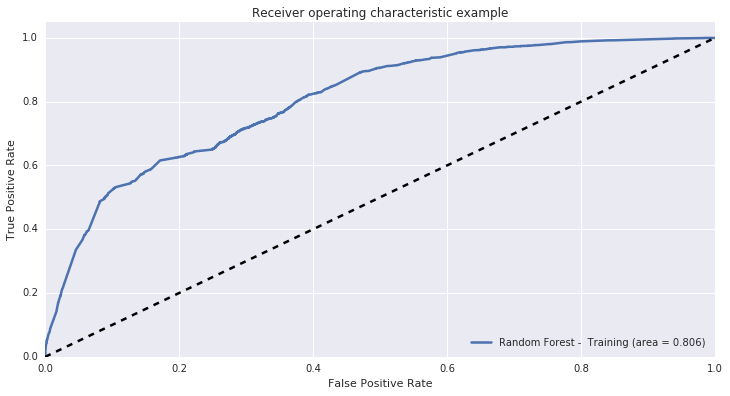

0.80626503079591139

In [23]:
Evaluate_ROC(spark_prediction_training,'Random Forest -  Training')

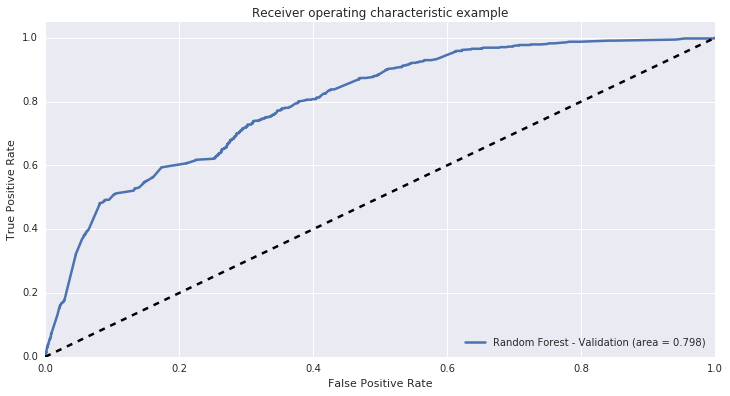

0.79793198225258377

In [24]:
Evaluate_ROC(spark_prediction_validation,'Random Forest - Validation')

We see that the results on training and validation are similar. The opposite would imply that the model overfitted the data!

---------

## Other classifiers

Let's now test a few other classifiers with their respective default options.
For each classifier to be tested, we define a new Build_New_Pipeline function, but note that only the line defining the classifier changes. 

NB: Not all classifier available in Spark are able to output the probability vector needed for calculating the ROC curve. Our choice is thus limited to just these few algorithms. 

---------

Let's start by defining a helper function to easily train and evaluate a model.

In [25]:
def EvaluatePipeline(pipeline,traindata=TrainingSet,validationdata=ValidationSet,modelname=''): 
    model=pipeline.fit(traindata)
    prediction_train = model.transform(traindata)
    prediction_validation = model.transform(validationdata)
    
    print "Training auc: %f " % Evaluate_ROC(prediction_train,modelname + ' - Training')
    print "Validation auc: %f " % Evaluate_ROC(prediction_validation,modelname + ' - Validation')

### Logistic classifier

In [26]:
def Build_New_Pipeline_LR(columns, MaxIter = 100, dataset=spark_train): 
    from pyspark.ml import Pipeline
    from pyspark.mllib.linalg import Vectors
    from pyspark.ml.feature import VectorAssembler,StandardScaler
    from pyspark.ml.feature import VectorIndexer,StringIndexer
    from pyspark.ml.classification import LogisticRegression

    
    assembler = VectorAssembler(
        inputCols=columns,
        outputCol="features")
    
    #We need to do this transform here because we need to fit the scaler on the assembled features.
    dataset_assembled = assembler.transform(dataset)

    scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)
    scalerModel = scaler.fit(dataset_assembled)

    #Again, transform needed because we need to fit the indexers 
    dataset_scaled = scalerModel.transform(dataset_assembled)


    featureIndexer = VectorIndexer(inputCol="scaledFeatures", outputCol="indexedFeatures", maxCategories=4).fit(dataset_scaled)
    labelIndexer = StringIndexer(inputCol="TARGET", outputCol="indexedLabels").fit(dataset_scaled)
    #No transform needed here as there is no need to fit anything until the end


    #Configure the RF classifier
    lr_classifier = LogisticRegression(featuresCol="indexedFeatures",labelCol="indexedLabels",
                                           predictionCol="prediction",probabilityCol="probability",maxIter=MaxIter)
  
    return Pipeline(stages=[assembler,scalerModel,featureIndexer,labelIndexer, lr_classifier]) 

/usr/hdp/2.4.0.0-169/spark/python/pyspark/ml/classification.py:207: UserWarning: weights is deprecated. Use coefficients instead.
  warnings.warn("weights is deprecated. Use coefficients instead.")


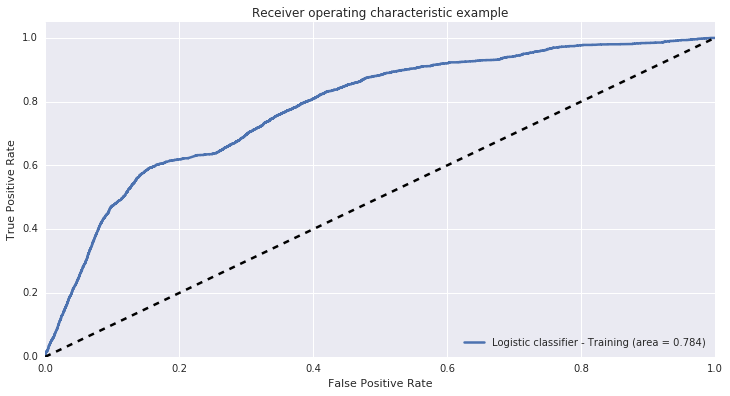

Training auc: 0.783800 


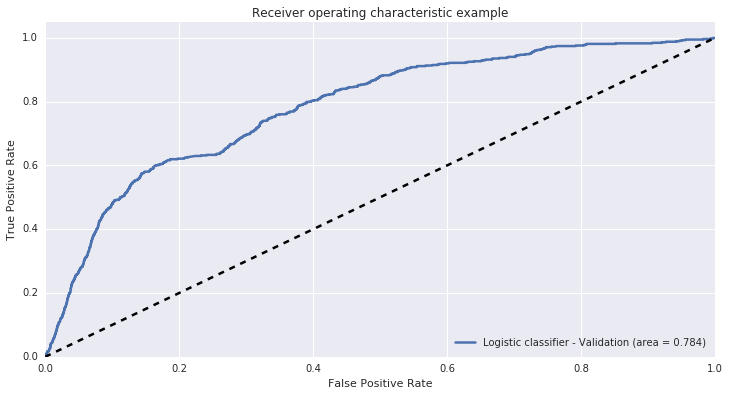

Validation auc: 0.783537 


In [27]:
EvaluatePipeline(Build_New_Pipeline_LR(features_columns),modelname='Logistic classifier')

### Decision tree

In [28]:
def Build_New_Pipeline_dtree(columns, MaxDepth = 5, dataset=spark_train): 
    from pyspark.ml import Pipeline
    from pyspark.mllib.linalg import Vectors
    from pyspark.ml.feature import VectorAssembler,StandardScaler
    from pyspark.ml.feature import VectorIndexer,StringIndexer
    from pyspark.ml.classification import DecisionTreeClassifier

    
    assembler = VectorAssembler(
        inputCols=columns,
        outputCol="features")
    
    #We need to do this transform here because we need to fit the scaler on the assembled features.
    dataset_assembled = assembler.transform(dataset)

    scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)
    scalerModel = scaler.fit(dataset_assembled)

    #Again, transform needed because we need to fit the indexers 
    dataset_scaled = scalerModel.transform(dataset_assembled)


    featureIndexer = VectorIndexer(inputCol="scaledFeatures", outputCol="indexedFeatures", maxCategories=4).fit(dataset_scaled)
    labelIndexer = StringIndexer(inputCol="TARGET", outputCol="indexedLabels").fit(dataset_scaled)
    #No transform needed here as there is no need to fit anything until the end


    #Configure the RF classifier
    lr_classifier = DecisionTreeClassifier(featuresCol="indexedFeatures",labelCol="indexedLabels",
                                           predictionCol="prediction",probabilityCol="probability",maxDepth=MaxDepth)
          
    return Pipeline(stages=[assembler,scalerModel,featureIndexer,labelIndexer, lr_classifier]) 

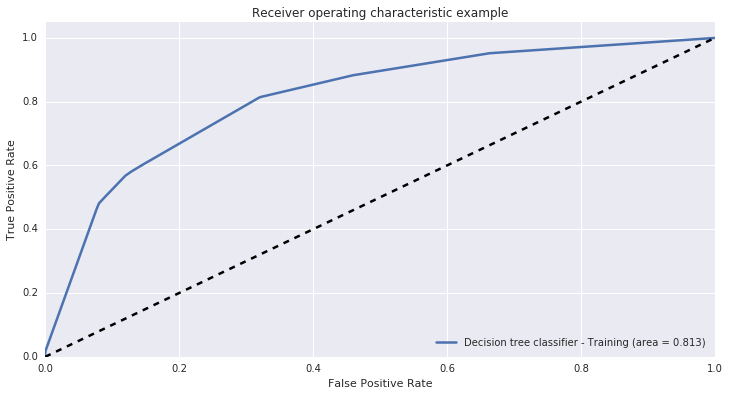

Training auc: 0.813330 


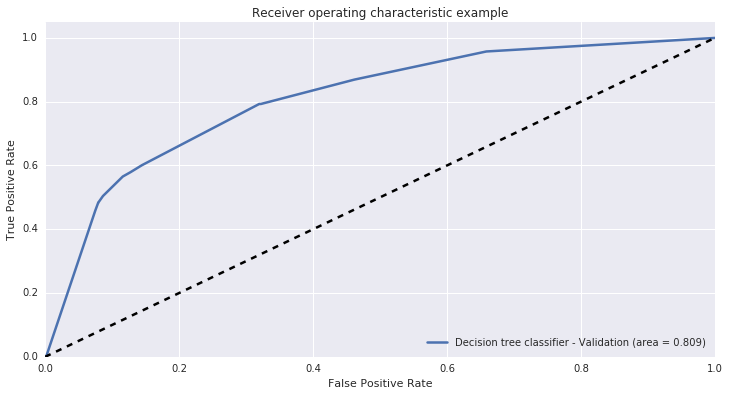

Validation auc: 0.808943 


In [29]:
EvaluatePipeline(Build_New_Pipeline_dtree(features_columns),modelname='Decision tree classifier')

Decision tree seems a little better than Random forest, but has a well known tendency to overfit data. We will continue with both classifiers in parallel.

## Simplifying the model

We previously noticed that most variables are only poorly correlated with the target class. 
We will now investigate wether all these variables are really needed in the model, or if we reduce the number of inputs to our classifier without affecting the result. 

------

We start by filtering the variables based on the previously calculated correlation value with the target class. 
The thresholds chosen here are arbitrary, and the selection done here can definitely be improved. 

In [30]:
varnames_extreme_corr = pd_var_target_cor[abs(pd_var_target_cor["TARGET"])>0.14]
varnames_strong_corr = pd_var_target_cor[abs(pd_var_target_cor["TARGET"])>0.05]
varnames_medium_corr = pd_var_target_cor[abs(pd_var_target_cor["TARGET"])>0.02]

print "Number of columns with corr > 0.14: %d" %varnames_extreme_corr.size
print "Number of columns with corr > 0.05: %d" %varnames_strong_corr.size
print "Number of columns with corr > 0.02: %d" %varnames_medium_corr.size

Number of columns with corr > 0.14: 4
Number of columns with corr > 0.05: 20
Number of columns with corr > 0.02: 136


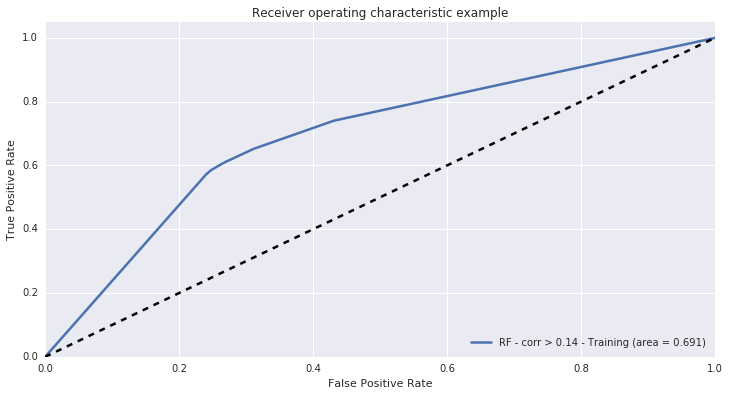

Training auc: 0.690959 


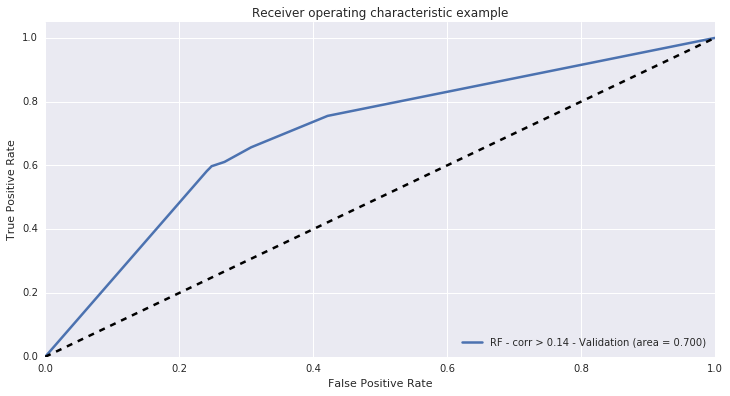

Validation auc: 0.699601 


In [31]:
EvaluatePipeline(Build_New_Pipeline(varnames_extreme_corr["VARNAME"].tolist()),modelname='RF - corr > 0.14')

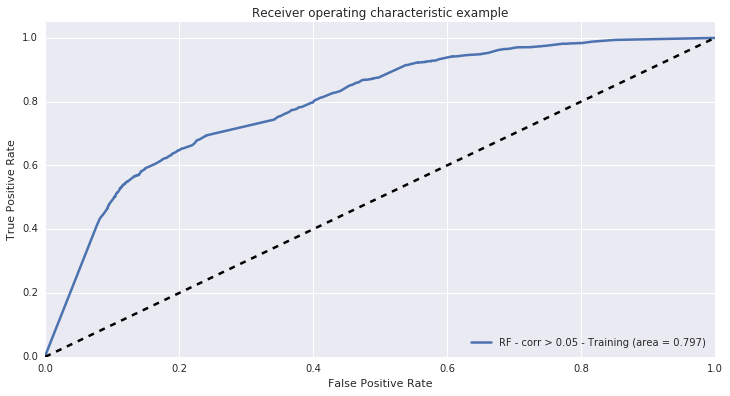

Training auc: 0.797425 


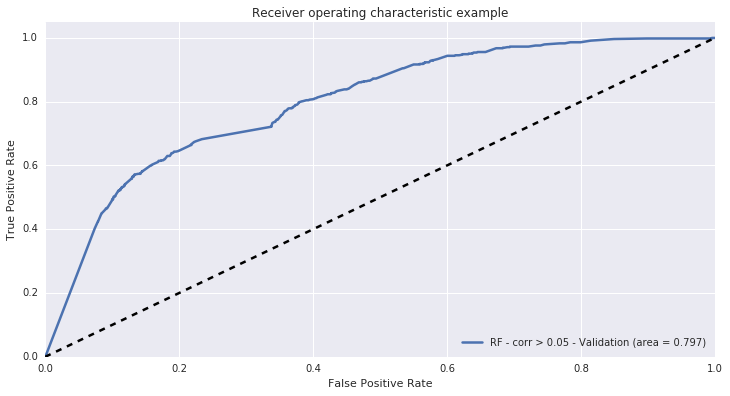

Validation auc: 0.797435 


In [32]:
EvaluatePipeline(Build_New_Pipeline(varnames_strong_corr["VARNAME"].tolist()),modelname='RF - corr > 0.05')

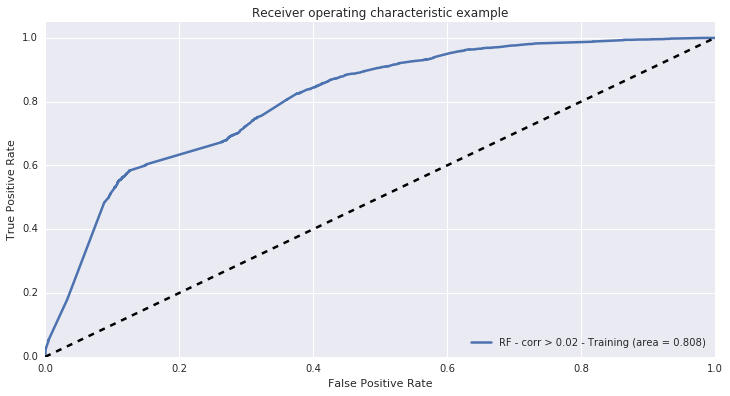

Training auc: 0.807838 


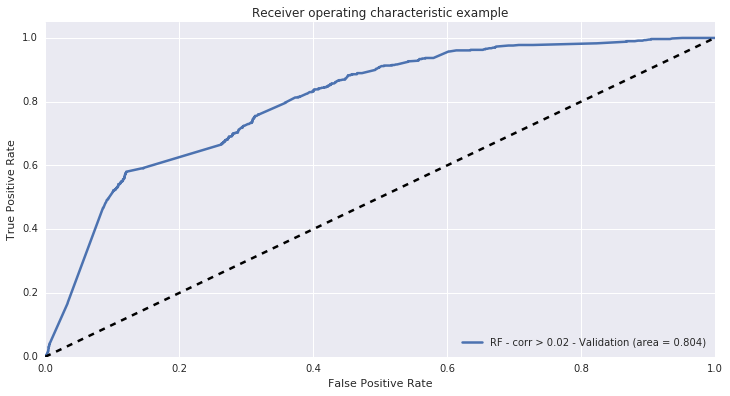

Validation auc: 0.803841 


In [33]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist()),modelname='RF - corr > 0.02')

Thus, we can already build a basic predictive model with only 4 variables!
Using 20 variables, the model is only slightly worse than using all of them, and with 136 variables, the model becomes better! (This implies that the remaining variables only add noise to the data). 

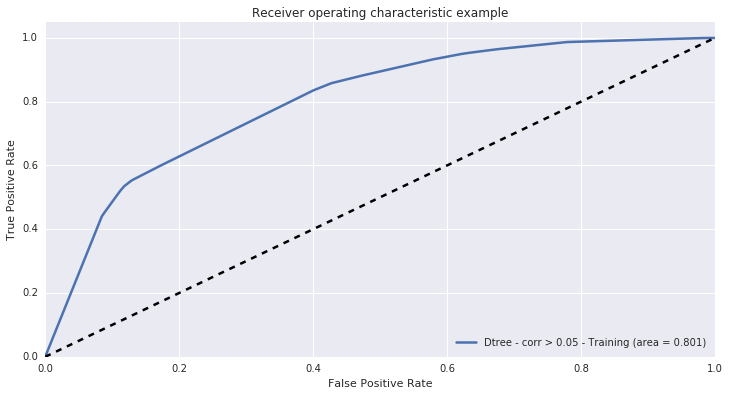

Training auc: 0.800665 


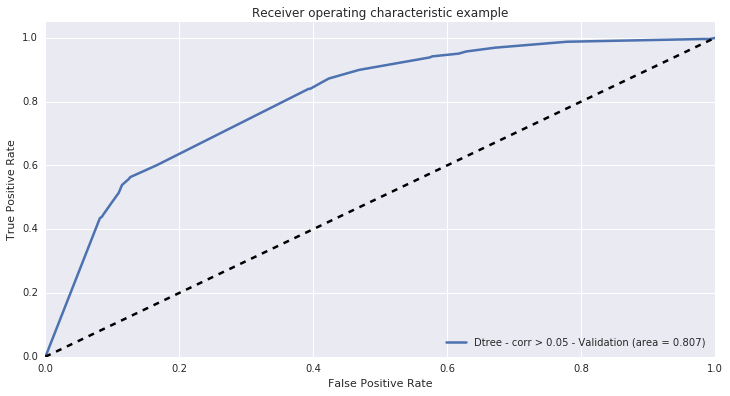

Validation auc: 0.807113 


In [34]:
EvaluatePipeline(Build_New_Pipeline_dtree(varnames_strong_corr["VARNAME"].tolist()),modelname='Dtree - corr > 0.05')

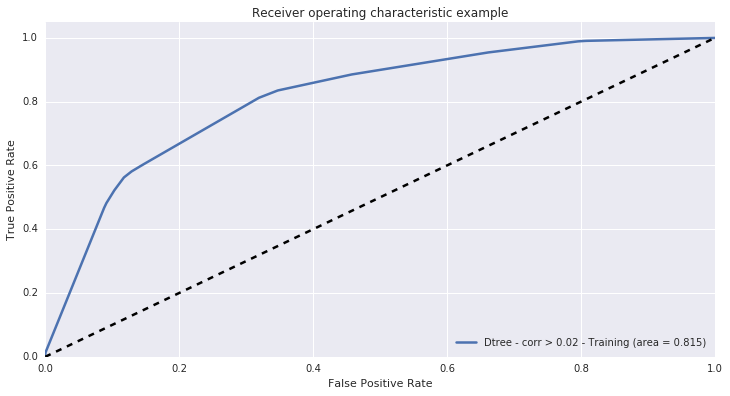

Training auc: 0.814860 


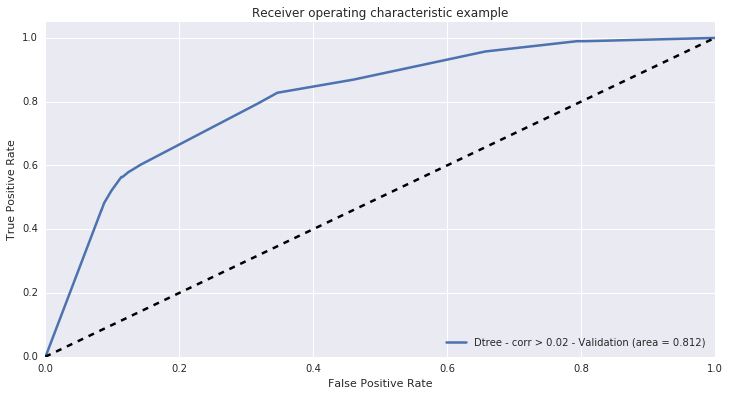

Validation auc: 0.811649 


In [35]:
EvaluatePipeline(Build_New_Pipeline_dtree(varnames_medium_corr["VARNAME"].tolist()),modelname='Dtree - corr > 0.02')

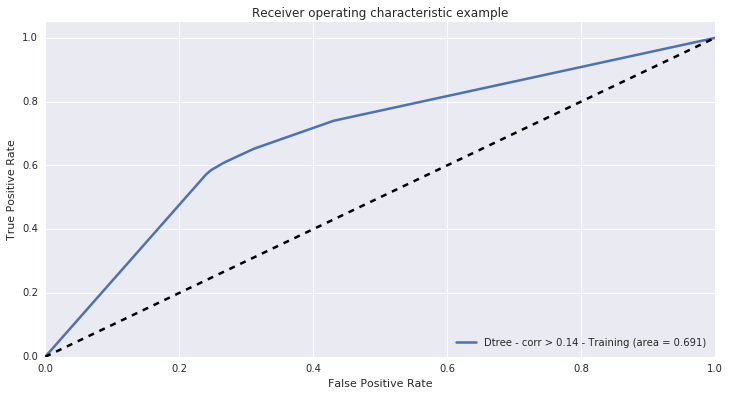

Training auc: 0.690959 


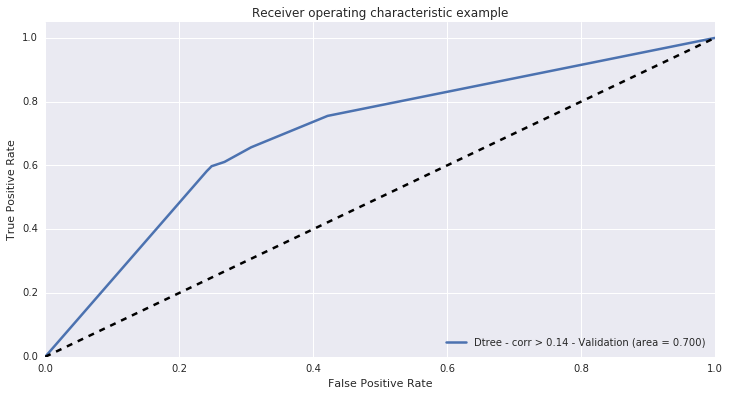

Validation auc: 0.699601 


In [36]:
EvaluatePipeline(Build_New_Pipeline_dtree(varnames_extreme_corr["VARNAME"].tolist()),modelname='Dtree - corr > 0.14')



-----

## Tuning the Classifier  ?

We will now use the 136 variables mentionned above and tune the maxdepth parameter of the decision tree  classifier to see if we can improve its results: 


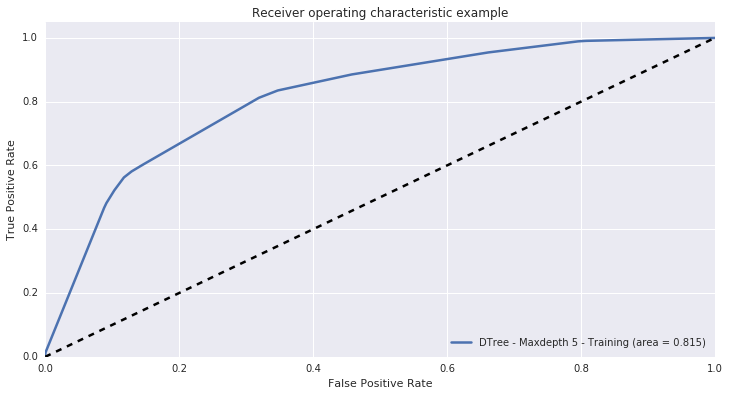

Training auc: 0.814860 


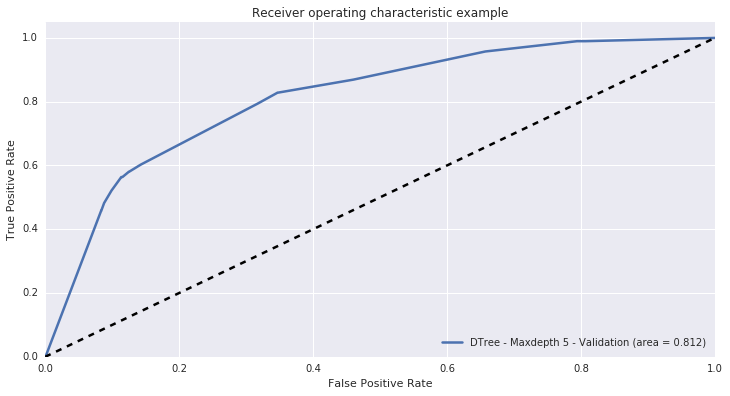

Validation auc: 0.811649 


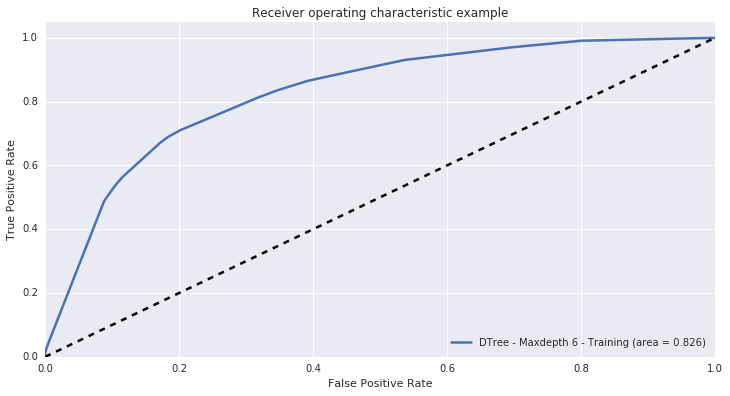

Training auc: 0.825642 


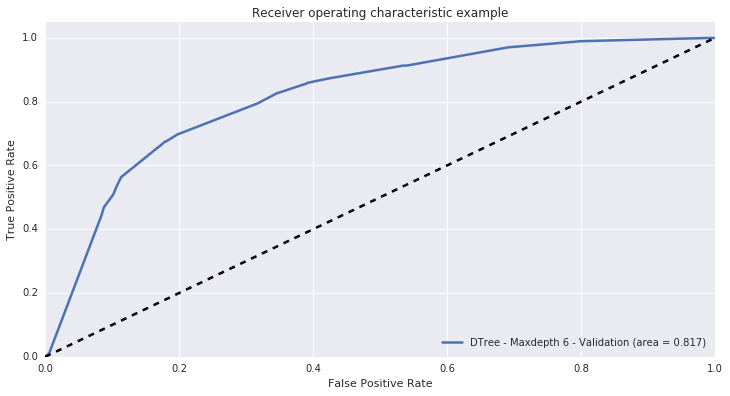

Validation auc: 0.816780 


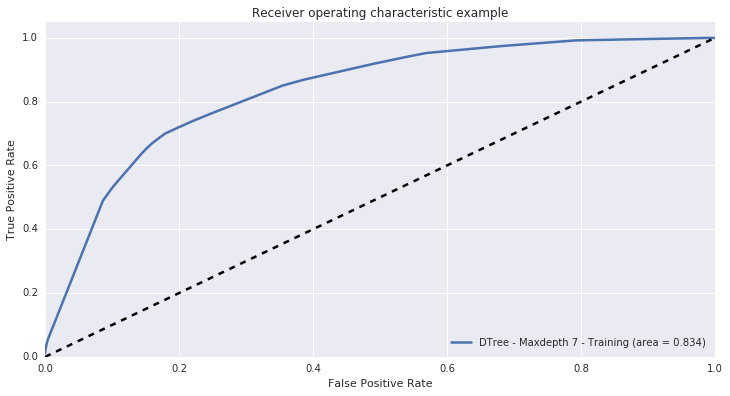

Training auc: 0.833511 


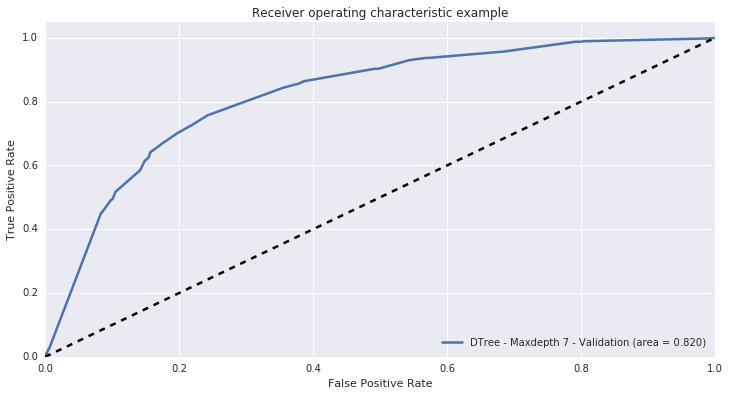

Validation auc: 0.820314 


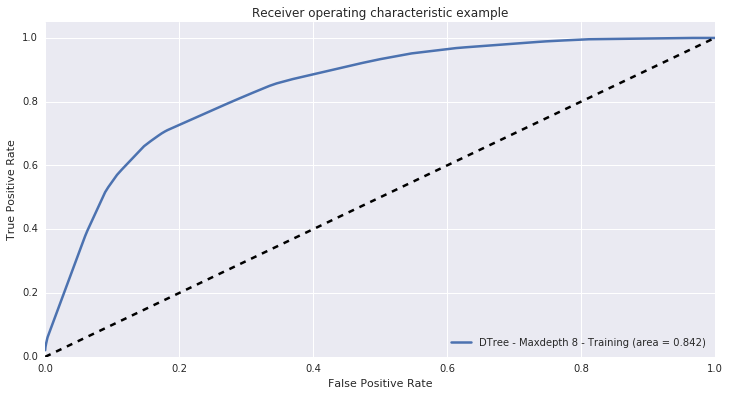

Training auc: 0.841990 


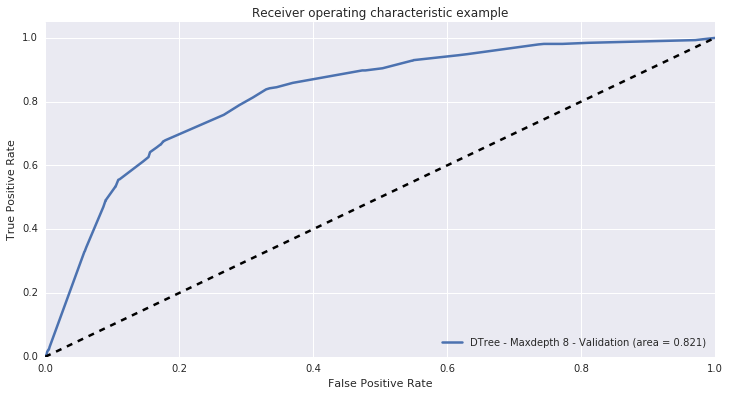

Validation auc: 0.821448 


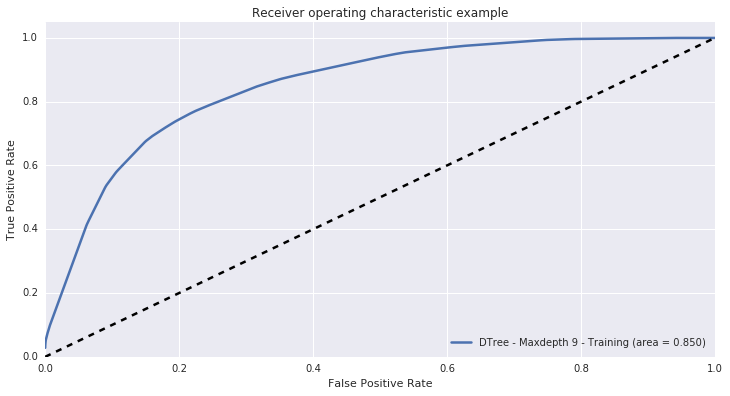

Training auc: 0.850394 


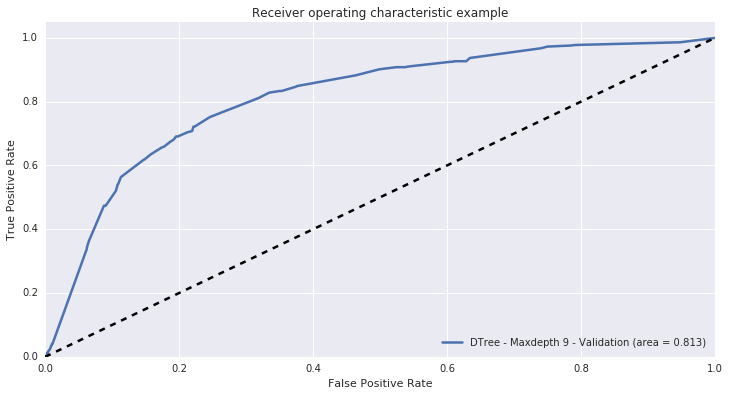

Validation auc: 0.813339 


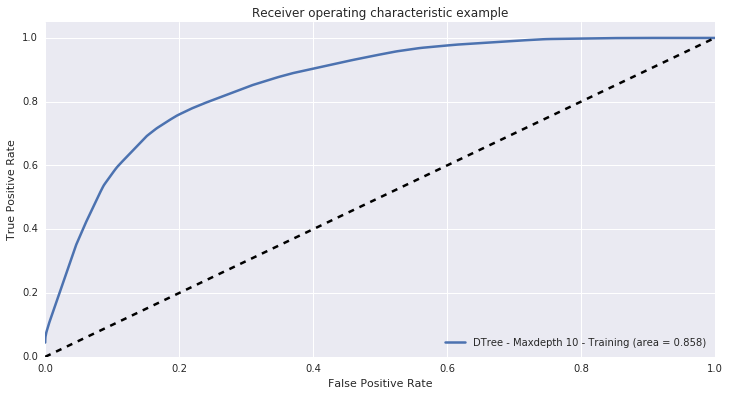

Training auc: 0.858173 


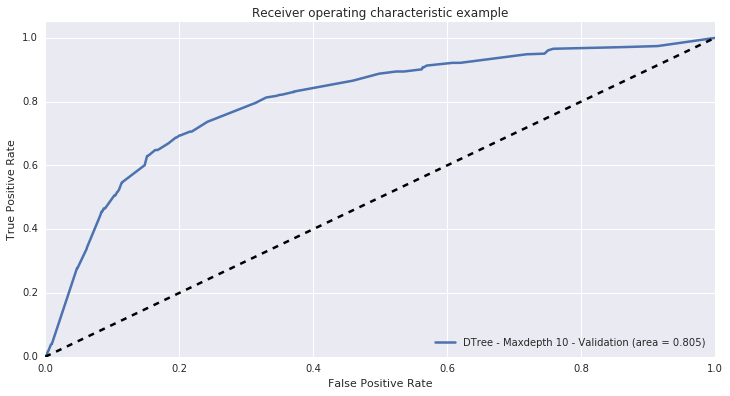

Validation auc: 0.804786 


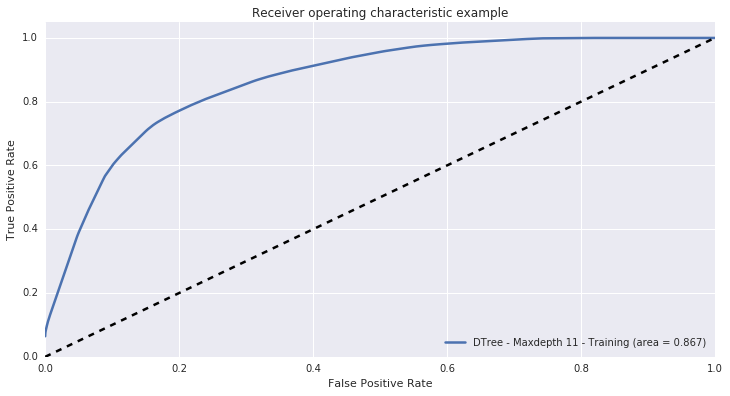

Training auc: 0.866518 


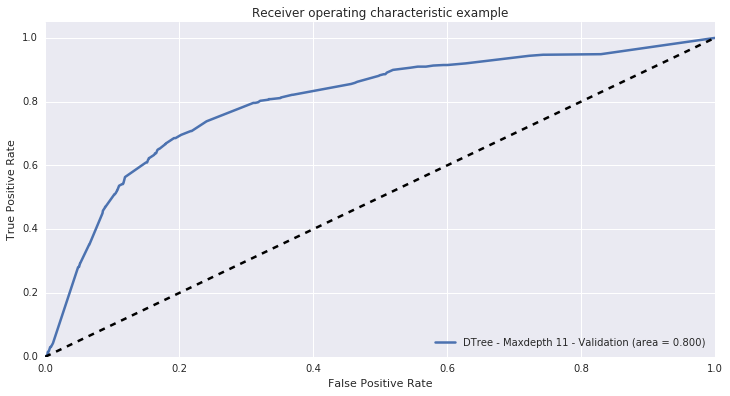

Validation auc: 0.800341 


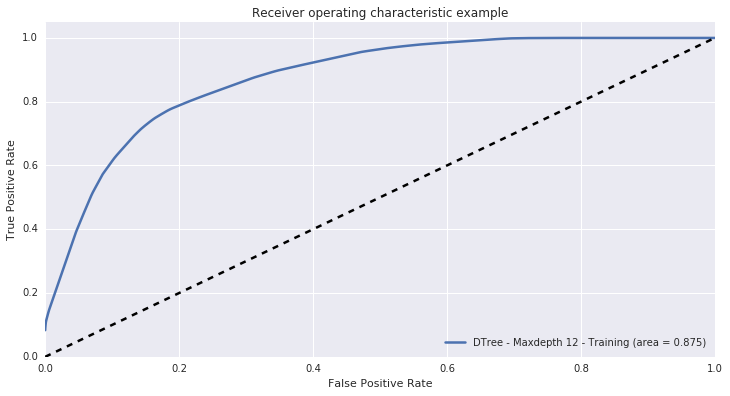

Training auc: 0.875158 


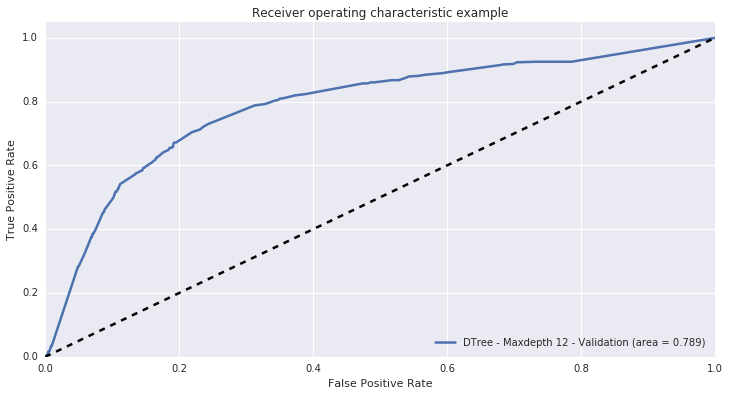

Validation auc: 0.788722 


In [37]:
for i in range(5,13):
    EvaluatePipeline(Build_New_Pipeline_dtree(varnames_medium_corr["VARNAME"].tolist(),MaxDepth = i),modelname='DTree - Maxdepth %d' %i)

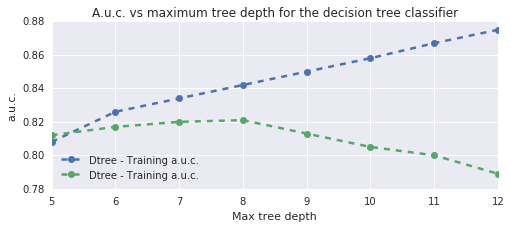

In [38]:
import numpy as np
depth = np.array([5,6,7,8,9,10,11,12])  #Data copy-pasted from results above so that there is no need to recompute the models
validation = np.array([0.812,0.817,0.820,0.821,0.813,0.805,0.8,0.789])
training = np.array([0.808,0.826,0.834,0.842,0.850,0.858,0.867,0.875])

import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

plt.figure(figsize=(8,3))
plt.plot(depth, training, label='Dtree - Training a.u.c.',marker="o",linestyle="--")
plt.plot(depth, validation, label='Dtree - Training a.u.c.',marker="o",linestyle="--")


plt.xlabel('Max tree depth')
plt.ylabel('a.u.c.')
plt.title('A.u.c. vs maximum tree depth for the decision tree classifier')
plt.legend(loc="lower left")
plt.show()
    


We clearly see that for a maximum tree depth higher than 8, the model starts to seriously overfit the data. 

----

Let's try a few different parameters for the random forest classifier as well: 

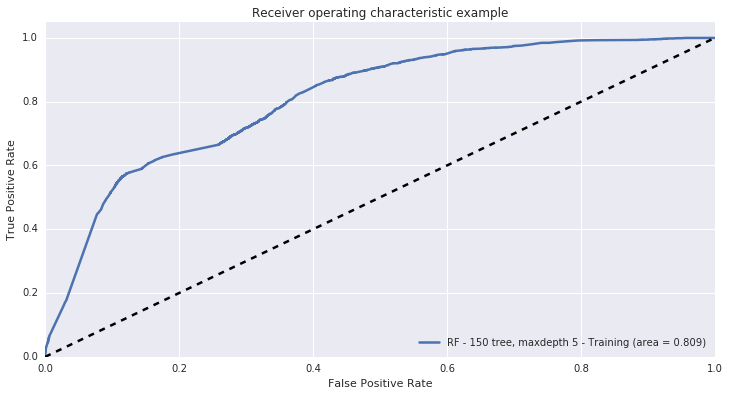

Training auc: 0.808937 


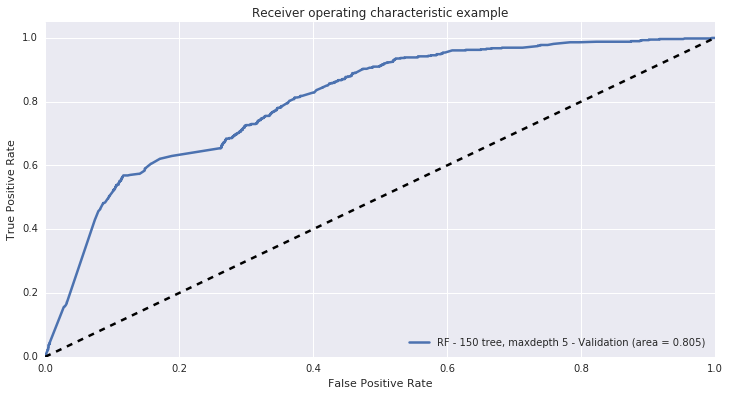

Validation auc: 0.805456 


In [39]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),NbTrees = 150, MaxTreeDepth = 5),modelname='RF - 150 tree, maxdepth 5')

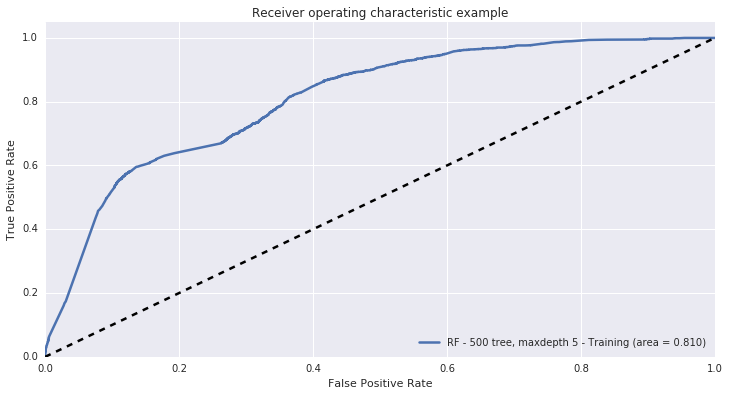

Training auc: 0.809889 


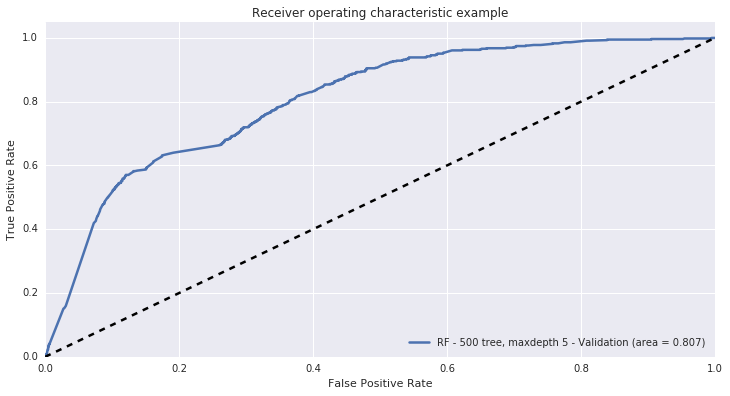

Validation auc: 0.807166 


In [40]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),NbTrees = 500, MaxTreeDepth = 5),modelname='RF - 500 tree, maxdepth 5')

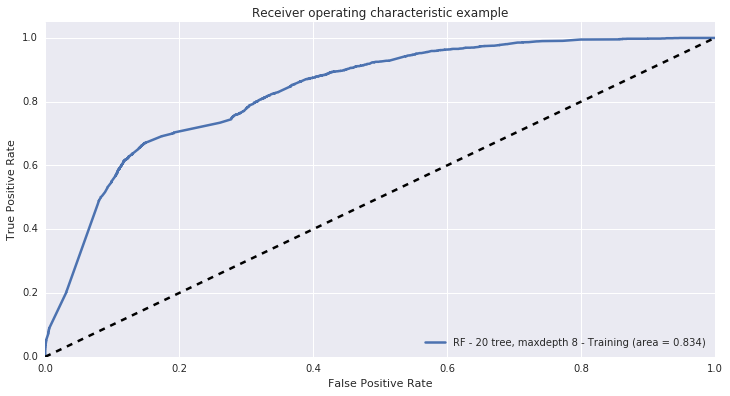

Training auc: 0.834112 


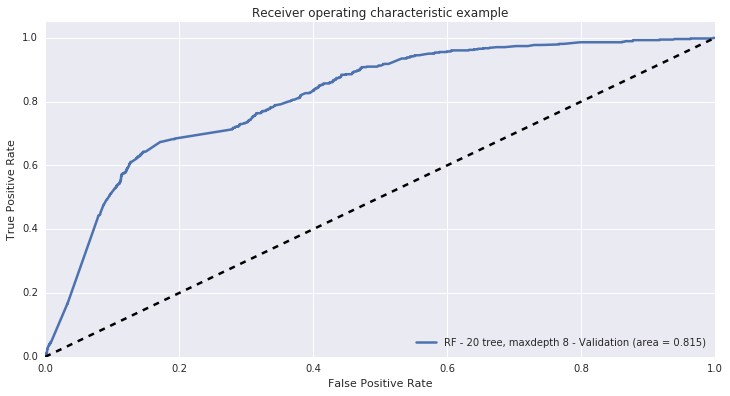

Validation auc: 0.814571 


In [41]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),NbTrees = 20, MaxTreeDepth = 8),modelname='RF - 20 tree, maxdepth 8')

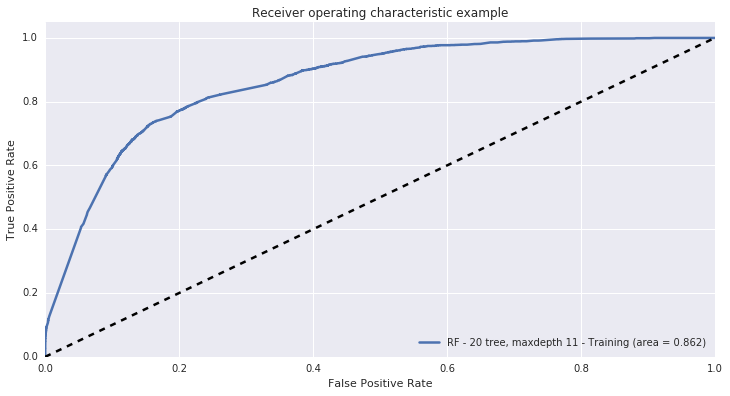

Training auc: 0.862437 


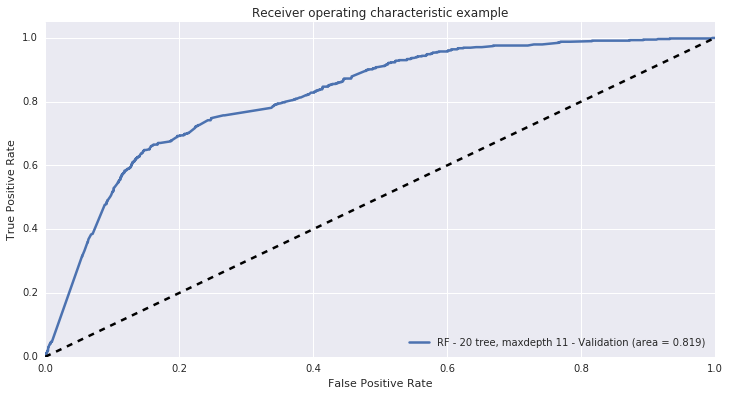

Validation auc: 0.818986 


In [42]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),NbTrees = 20, MaxTreeDepth = 11),modelname='RF - 20 tree, maxdepth 11')

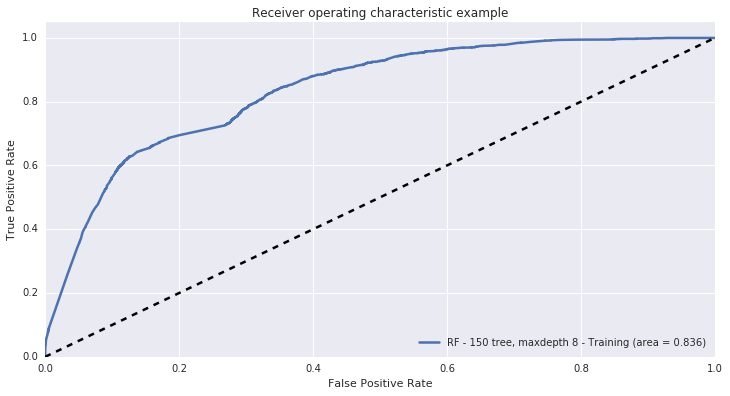

Training auc: 0.835783 


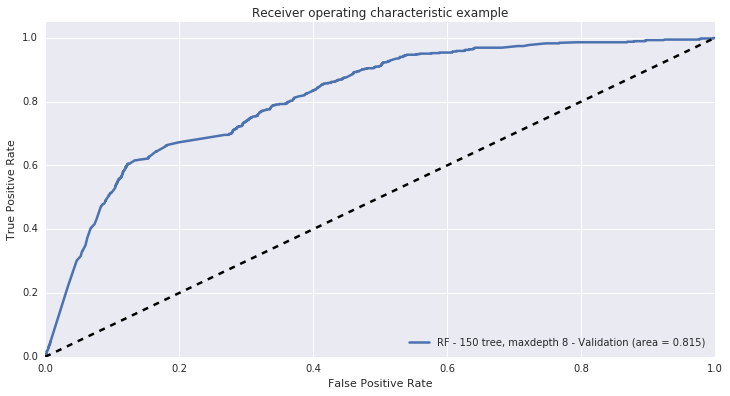

Validation auc: 0.814798 


In [43]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),NbTrees = 150, MaxTreeDepth = 8),modelname='RF - 150 tree, maxdepth 8')

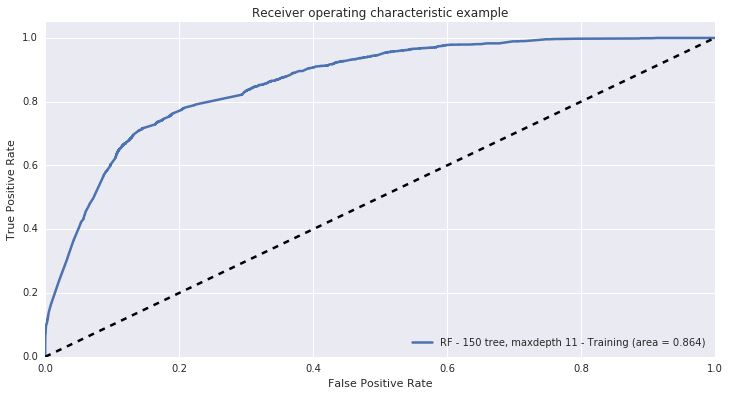

Training auc: 0.863811 


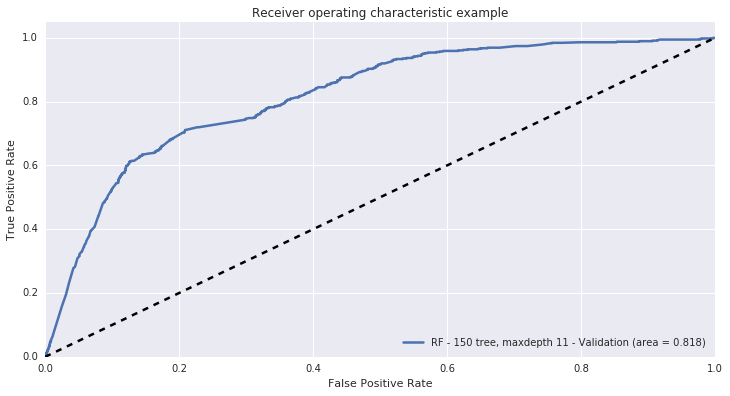

Validation auc: 0.818107 


In [44]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),NbTrees = 150, MaxTreeDepth = 11),modelname='RF - 150 tree, maxdepth 11')

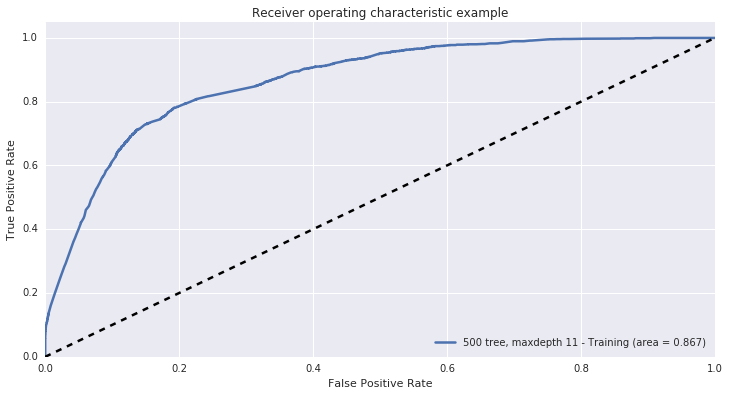

Training auc: 0.866535 


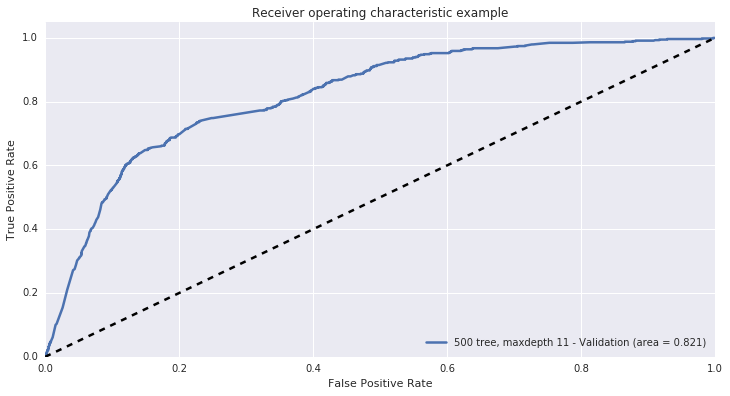

Validation auc: 0.820863 


In [45]:
EvaluatePipeline(Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),NbTrees = 400, MaxTreeDepth = 11),modelname='500 tree, maxdepth 11')

So......?

------ 

## Submitting to Kaggle

The last step is now to take the model we believe to be the best and use it to make predictions on the test data. 
The predictions is then saved as a .csv files to be uploaded to Kaggle. 

-------


Import the data and apply the same transformations we did to the train.csv file. 
Note that the test data has no column "TARGET" ==> We create such a column and fill it with NaN for having consistent schemas accross both datasets. 

In [46]:
#sf_test = sframe.SFrame.read_csv('/home/xadmin/Santander/data/test.csv',nrows_to_infer=80000) #On cluster
sf_test = sframe.SFrame.read_csv('./data/test.csv',nrows_to_infer=80000) #On VM

sf_test["TARGET"]=float('nan')
spark_test = sf_test.to_spark_dataframe(sc,sqlContext,1)

spark_tmp_df=spark_test
for col in sf_columns_to_remove["summary"]:
    spark_tmp_df=spark_tmp_df.drop(col)
spark_test_filtered=spark_tmp_df   

Read 67325 lines. Lines per second: 13746.1

Finished parsing file /media/sf_VMShared/Santader/data/test.csv

Parsing completed. Parsed 75818 lines in 5.27642 secs.

------------------------------------------------------
Inferred types from first 80000 line(s) of file as 
column_type_hints=[int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,float,float,float,float,float,float,float,int,float,float,float,int,float,float,float,float,int,int,float,float,float,float,float,int,float,float,int,float,float,int,int,int,int,float,

Read 67325 lines. Lines per second: 9663.96

Finished parsing file /media/sf_VMShared/Santader/data/test.csv

Parsing completed. Parsed 75818 lines in 7.31477 secs.

/var/tmp/graphlab-root/31317/a9c6b2e1-5b23-4639-9910-d0439dcff66b


In [47]:
#final_pipeline = Build_New_Pipeline_dtree(varnames_medium_corr["VARNAME"].tolist(),MaxDepth = 8)
#final_pipeline = Build_New_Pipeline(varnames_medium_corr["VARNAME"].tolist(),MaxTreeDepth=8,NbTrees=150)
final_pipeline = Build_New_Pipeline_dtree(varnames_medium_corr["VARNAME"].tolist(),MaxDepth = 7)
final_model = final_pipeline.fit(spark_train_filtered) #Now train on ALL the dataset, no split into learn+validation
spark_final_predictions = final_model.transform(spark_test_filtered)

In [48]:
pd_final = spark_final_predictions.select('ID','probability').toPandas()
pd_final.head()

,ID,probability
0,2,"[0.967184191955, 0.0328158080452]"
1,5,"[0.923815236953, 0.0761847630474]"
2,6,"[0.998437133703, 0.00156286629679]"
3,7,"[0.981483896206, 0.0185161037945]"
4,9,"[0.998437133703, 0.00156286629679]"


For Kaggle, we only need the probability of TARGET=1, not the whole probability verctor. We thus extract the second element for evey line and adapt to the file format we need

In [49]:
pd_final["TARGET"] = pd_final["probability"].map(lambda x: x[1])  
pd_final.drop('probability', axis=1, inplace=True)
pd_final.index=pd_final["ID"]
pd_final.drop('ID', axis=1, inplace=True)
pd_final.head()

,TARGET
ID,
2,0.032816
5,0.076185
6,0.001563
7,0.018516
9,0.001563


Write the file to disk

In [50]:
pd_final.to_csv('Dtree_final_7.txt')

and submit it to Kaggle!